### Загрузка данных и подготовка их к анализу

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
from pandas.plotting import register_matplotlib_converters
import warnings


data = pd.read_csv('/datasets/hypothesis.csv')
data.info()
data.columns = [x.lower() for x in data.columns] #нижний регистр колонок
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные содержат небольшую таблицу на 9 строк с числовыми показателями. Для удобства было решено перевести названия всех 5 
колонок к нижнему регистру.

**Расчет ICE**

In [2]:
pd.options.display.max_colwidth = 210
data['ICE']=(data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Расчет RICE**

In [3]:
data['RICE']=(data['reach']*data['impact']*data['confidence'])/data['efforts']
print(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

RICE отличается от ICE тем, что учитывает компонент Reach — скольких пользователей затронет изменение, которое вы хотите внести. Топ-5 по ICE и RICE состоит из одних и тех же гипотез, но в разном порядке приоритизации. Добавление формы подписки на все основные страницы является самой широкой по охвату пользователей гипотезой, поэтому она лидирует в RICE. Добавление новых каналов привлечения в обоих приоритезациях примерно на одном уровне, так как на прямю связано с привлечением потенциальных клиентов и по задумке должно иметь сильный эффект. Цвет фона главной страницы не сильно влияет на пользовательскую активность, поэтому в приоритизации это аутсайдер. Добавление отзывов имеет низкую уверенность, а по скольку низкая доля пользователей используует эту опцию в обоих топах показатель гипотезы низкий. Запустить акцию, дающую скидку на товар касается меньшего количества пользователей, но точно имеет сильный потенциал по конверсии, поэтому в ICE гипотеза лидирует, а в RICE находится в середине рейтинга.

### Анализ A/B-теста

In [4]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [5]:
display(orders.groupby('group').agg({'revenue':'count'})) #считаем количество пользователей по группам
visA=orders[orders['group']=='A']['visitorId'].unique()
visB=orders[orders['group']=='B']['visitorId'].unique()
result=list(set(visA) & set(visB))
orders=orders.query('visitorId not in @result') #удаляем дубликаты

display('Дата начала теста',orders['date'].min())
display('Дата окончания теста',orders['date'].max())
orders.info()
display('новое распределение по группам', orders.groupby('group').agg({'revenue':'count'})) #новое распределение по группам

,revenue
group,
A,557
B,640


'Дата начала теста'

Timestamp('2019-08-01 00:00:00')

'Дата окончания теста'

Timestamp('2019-08-31 00:00:00')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


'новое распределение по группам'

,revenue
group,
A,468
B,548


In [6]:

datesGroups=orders[['date','group']].drop_duplicates() 
ordersAggregated=datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  revenue  visitors
0 2019-08-01     A      19   142779       719
1 2019-08-01     B      17    59758       713
2 2019-08-02     A      36   234381      1338
3 2019-08-02     B      39   221801      1294
4 2019-08-03     A      60   346854      1845


**График кумулятивной выручки по группам**

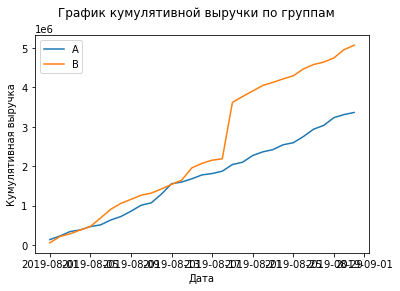

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.suptitle("График кумулятивной выручки по группам")
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show()

Выручка почти равномерно увеличивается по группе А в течение всего теста, однако по В наблюдаем резкий скачок в серидине периода. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

**График кумулятивного среднего чека по группам**

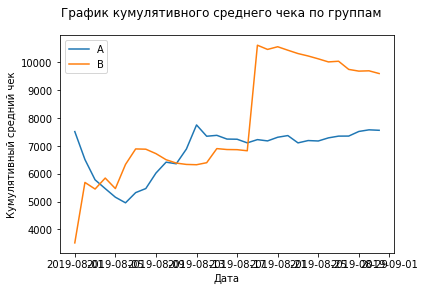

In [8]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.suptitle("График кумулятивного среднего чека по группам")
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.show()

Средний чек равномерно растет ближе к концу теста для группы A и скачками увеличивается для группы B. Возможно, в группу B во второй половине августа попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Отметим также синхронное кратковременное падение графиков в начале теста.

**График относительного изменения кумулятивного среднего чека группы B к группе A**

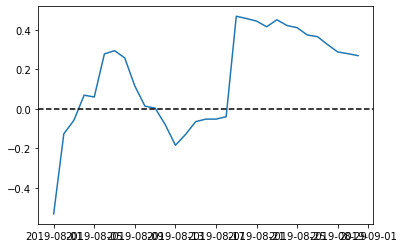

In [9]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Различия между сегментами резко скачет в пользу группы В, причем заметно подовляющее превосходство кумулятивного среднего чека у данной группы. Небольшой провал зафиксирован в середине периода, но он был быстро отыгран. Здесь могут быть замешаны крупные заказы и выбросы.

**График кумулятивного среднего количества заказов по группам**

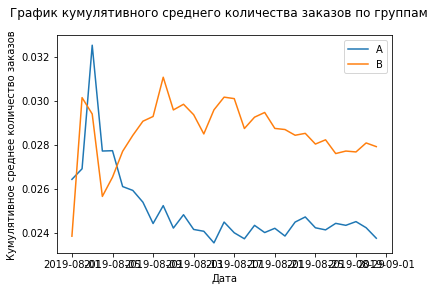

In [10]:
# строим графики
cdA=cumulativeData.query('group=="A"')
cdB=cumulativeData.query('group=="B"')

plt.plot(cdA['date'], cdA['orders']/cdA['visitors'], label='A')
plt.plot(cdB['date'], cdB['orders']/cdB['visitors'], label='B')

plt.suptitle("График кумулятивного среднего количества заказов по группам")
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.legend()
plt.show()

По объему заказов расхождение увеличивается со временем, но не выглядит аномально резким, имеет равномерный характер. Группа В снова занимает лидирующие позиции. Возможно, именно за счет объема заказов наблюдается доминации по среднему чеку у данной группы.

**График относительного изменения кумулятивного среднего количества заказов группы B к группе A**

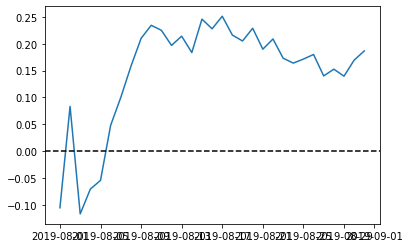

In [11]:
# cтроим отношение средних заказов
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Относительное изменение показывает, что в общей массе опережение объема заказов по группе В - более 10%. Провал в первых числах августа был отыгран за пару дней. Возможно, яма на графике - это аномалия, вызванная технической ошибкой или человеческим фактором.

**Точечный график количества заказов по пользователям**

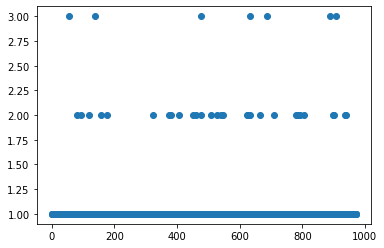

In [12]:
ordersByUsers=orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']
#print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))


Большое количество пользователей оформили заказ в августе лишь один раз. Меньше посетителей оформили 2 заказа, еще чуть меньше по 3. 

**95-й и 99-й перцентили количества заказов на пользователя**

In [13]:
# Методом np.percentile('column', [percentile1, percentile2, percentile3]) находим перцентили
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей оформляли больше 2 заказов. И 10% пользователей заказывали более 1 раза.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

**Точечный график стоимостей заказов**

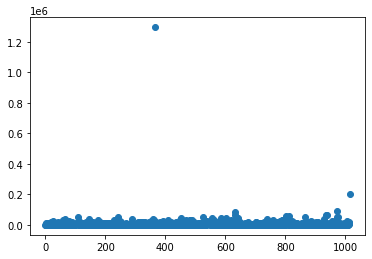

In [14]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

Всё, как предполагали: есть несколько дорогих заказов в районе 100 000-200 000 рублей, один заказ вовсе на сумму более 1.2 млн рублей. По графику можно выбрать границу аномальных заказов на отметке в 100 000 рублей, отсеив до 5%. 

**95-й и 99-й перцентили стоимости заказов**

In [15]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Значит границу аномальных заказов можно сместить к 60 000 рублей.

**Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным**

In [16]:
# разбиваем таблицу с количеством пользователей по датам отдельно по группам
dfA=visitorsAggregated.query('group=="A"') 
dfB=visitorsAggregated.query('group=="B"')

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(dfA['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(dfB['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

0.00958


По «сырым» данным различия в среднем числе заказов групп A и B имеются.

p-value = 0.00958 меньше 0.05. Значит, гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Н0: различий в среднем чеке между группами нет. 

Н1: различия в среднем чеке между группами есть. 


In [17]:
print('{0:.5f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


0.82949



P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, кумулятивный средний чек группы B значительно выше среднего чека группы A.

**Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным**

In [18]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
15


Наблюдаем 15 аномальных заказов.

In [19]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                dfA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                dfB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [20]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.00555


Результаты по среднему количеству заказов снизились на 0.004. Все так же P-value < 0.05. 

**Статистическая значимость различий в среднем чеке между группами по «очищенным» данным**

In [21]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)



0.827


P-value увеличился почти на 0,1. Вывод не изменился. Таким образом, сильный кумулятивный результат группы В по среднему чеку обусловлен, в первую очередь, опережением группы А по объему заказов. 

### Вывод

Имеющиеся факты:

Существует статистически значимое различие по среднему количеству заказов между группами и по "сырым" данным, и по данным после фильтрации аномалий;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

График относительного изменения кумулятивного среднего количества заказов группы B к группе A показывает, что в общей массе опережение объема заказов по группе В - более 10%;

Кумулятивный средний чек равномерно растет ближе к концу периода для группы A и скачками увеличивается для группы B, так как в группу B во второй половине августа попали заказы на крупные суммы. Это так же подтверждает график выручки, где даже без учета аномальных всплесков фиксируется превосходство группы В.



**Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.**